# PUNTO DOS PRUEBA 

### Realizado por:
###### Camilo Andres Barajas Bustos 

## Paso 1 

Importar librerias 

In [1]:
import pandas as pd
import pymysql
import numpy as np

## Paso 2

Armar la coneccion con el servidor 

In [2]:
host="shiny-demo.csa7qlmguqrf.us-east-1.rds.amazonaws.com"
port=3306
dbname="shinydemo"
user="guest"
password="guest"

conn = pymysql.connect(host, user=user,port=port,
                           passwd=password, db=dbname)

## Paso 3

Descargar Data Sets de la siguiente forma City, Country y Country Language

In [3]:
Data_city = pd.read_sql('SELECT * FROM City;',con=conn)
Data_city.head()

,ID,Name,CountryCode,District,Population
0,1.0,Kabul,AFG,Kabol,1780000.0
1,2.0,Qandahar,AFG,Qandahar,237500.0
2,3.0,Herat,AFG,Herat,186800.0
3,4.0,Mazar-e-Sharif,AFG,Balkh,127800.0
4,5.0,Amsterdam,NLD,Noord-Holland,731200.0


In [4]:
Data_country = pd.read_sql('SELECT * FROM Country;',con=conn)
Data_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [5]:
Data_language = pd.read_sql('SELECT * FROM CountryLanguage;',con=conn)
Data_language.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


## Paso 4 

Analisis de la data disponible 

Se mira el tamaño del data set de paises 

In [6]:
Data_country.shape

(239, 15)

Se mira los nombres de los paises para ver si estos se repiten dentro de la base de datos

In [7]:
CT = pd.DataFrame(Data_country.Name.unique())

In [8]:
CT.count()

0    239
dtype: int64

In [9]:
new = pd.DataFrame(Data_city.groupby(['CountryCode'], sort=False)['Population'].sum(),columns=['Population'])

In [10]:
new.reset_index(level=0, inplace=True)

In [11]:
new.head()

,CountryCode,Population
0,AFG,2332100.0
1,NLD,5050879.0
2,ALB,270000.0
3,DZA,4434123.0
4,ASM,7523.0


In [12]:
idx = Data_language.groupby(['CountryCode'])['Percentage'].transform(max) == Data_language['Percentage']

In [13]:
Max_Leng = Data_language[idx]

In [14]:
Max_language= Max_Leng.drop_duplicates(subset='CountryCode', keep="first")

In [15]:
Max_language.head()

,CountryCode,Language,IsOfficial,Percentage
2,ABW,Papiamento,F,76.7
6,AFG,Pashto,T,52.4
17,AGO,Ovimbundu,F,37.2
18,AIA,English,T,0.0
19,ALB,Albaniana,T,97.9


### Punto 1 -  Se desea saber en una visualizacion Paises con lengua principal y Población que lo habla.

Se crea el DataFrame para realizar el analisis 

In [16]:
Data_country['CountryCode'] = Data_country.Code

In [17]:
New_count = Data_country.merge(Max_language,on=['CountryCode'])

In [18]:
New_count.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,CountryCode,Language,IsOfficial,Percentage
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,ABW,Papiamento,F,76.7
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,AFG,Pashto,T,52.4
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,AGO,Ovimbundu,F,37.2
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,AIA,English,T,0.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,ALB,Albaniana,T,97.9


Se transforman las variables y se realiza la comparacion de poblacion totak por idioma 

In [19]:
New_count['Percentage']= New_count['Percentage'].replace(0,100)

In [20]:
New_count['Prop'] = New_count['Percentage']/100

In [21]:
New_count['PoblaIdioma'] = New_count['Prop']*New_count['Population']

In [22]:
New_count.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,...,GovernmentForm,HeadOfState,Capital,Code2,CountryCode,Language,IsOfficial,Percentage,Prop,PoblaIdioma
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,...,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,ABW,Papiamento,F,76.7,0.767,79001.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,...,Islamic Emirate,Mohammad Omar,1.0,AF,AFG,Pashto,T,52.4,0.524,11905280.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,...,Republic,José Eduardo dos Santos,56.0,AO,AGO,Ovimbundu,F,37.2,0.372,4790616.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,...,Dependent Territory of the UK,Elisabeth II,62.0,AI,AIA,English,T,100.0,1.000,8000.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,...,Republic,Rexhep Mejdani,34.0,AL,ALB,Albaniana,T,97.9,0.979,3329774.8


In [23]:
print ('Max',New_count.PoblaIdioma.max(),' ', 'Min', '',New_count.PoblaIdioma.min(), 'Mode', '',New_count.PoblaIdioma.mode(), 'Mean', '',New_count.PoblaIdioma.mean())

Max 1175353360.0   Min  0.0 Mode  0    2000.0
dtype: float64 Mean  18430563.342918452


In [24]:
New_count['PoblaIdioma'].describe()

count    2.330000e+02
mean     1.843056e+07
std      8.485484e+07
min      0.000000e+00
25%      2.670030e+05
50%      3.017976e+06
75%      9.892552e+06
max      1.175353e+09
Name: PoblaIdioma, dtype: float64

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap as Color
import numpy as np
import matplotlib.cm as cm

def scatterplot(x_data, y_data, s ,x_label="", y_label="", title="", color = 'rgb' ,yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s , alpha = 0.3, color = color )

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [26]:
other_l = ['Nepali','Arabic','Pashto','Romanian','Singali','Dutch','Khmer','Hungarian','Luba','Zulu','Shona','Czech','Haiti Creole',
'Swedish','Rwanda','Akan','Kazakh','Nyamwesi','Azerbaijani','Bulgariana','Belorussian','Malay','Kirundi','Chichewa','Kikuyu','Mossi',
'Hausa','Greek','Makua','Serbo-Croatian','Somali','Danish','Finnish','Ovimbundu','Slovak','Wolof','Ganda','Hebrew','Tadzhik','Papuan Languages',
'Lao','Bambara','Georgiana','Turkmenian','Albaniana','Armenian','Canton Chinese','Lithuanian','Ful','Kirgiz','Bemba','Fon','Hassaniya',
'Norwegian','Sara','Mongolian','Tigrinja','Sotho','Slovene','Mende','Kongo','Macedonian','Latvian','Fang','Tswana','Ewe','Dzongkha',
'Estonian','Swazi','Ovambo','Gbaya','Kpelle','Creole English','Malinke','Comorian','Creole French','Fijian','Maltese','Sranantonga',
'Crioulo','Dhivehi','Luxembourgish','Icelandic','Bajan','Malenasian Languages','Papiamento','Tahitian','Bislama','Tongan','Samoan-English',
'Kiribati','Seselwa','Mahoré','Marshallese','Samoan','Trukese','Greenlandic','Faroese','Philippene Languages','Palau','Futuna',
'Tuvalu','Nauru','Pitcairnese']

In [27]:
other_c = ['North Korea','Nigeria','Venezuela','Philippines','Saudi Arabia','Peru','Romania','Ethiopia','Canada','Morocco','Yemen',
'Iraq','Uzbekistan','Madagascar','Australia','Netherlands','Taiwan','Sudan','Syria','Chile','Malaysia','Nepal','Afghanistan','Ecuador',
'Sri Lanka','Cuba','Ghana','Greece','Somalia','Portugal','Cambodia','Hungary','Congo, The Democratic Republic of the','South Africa',
'Zimbabwe','Czech Republic','Dominican Republic','Haiti','Yugoslavia','Sweden','Rwanda','Kazakstan','Austria','Guatemala','Bolivia',
'Tanzania','Azerbaijan','Bulgaria','Belarus','Tunisia','Burundi','Malawi','Honduras','Kenya','El Salvador','Belgium','Hong Kong',
'Burkina Faso','Niger','Mozambique','Libyan Arab Jamahiriya','Denmark','Jordan','Nicaragua','Finland','Angola','Slovakia','Senegal',
'Switzerland','Côte d’Ivoire','Norway','Croatia','Uganda','Bosnia and Herzegovina','Israel','Costa Rica','Tajikistan','Papua New Guinea',
'Ireland','Laos','Mali','Georgia','Turkmenistan','New Zealand','Albania','Armenia','Uruguay','Lebanon','Paraguay','Lithuania','Palestine',
'Cameroon','Guinea','Kyrgyzstan','Singapore','Zambia','Moldova','Jamaica','Benin','Panama','Mauritania','Chad','Mongolia','Puerto Rico',
'Oman','Eritrea','Lesotho','Slovenia','Sierra Leone','Kuwait','Congo','Macedonia','Latvia','Botswana','Trinidad and Tobago','Togo',
'Bhutan','United Arab Emirates','Estonia','Swaziland','East Timor','Namibia','Central African Republic','Guyana','Mauritius',
'Réunion','Liberia','Cyprus','Gambia','Guinea-Bissau','Gabon','Comoros','Guadeloupe','Cape Verde','Bahrain','Fiji Islands',
'Macao','Equatorial Guinea','Martinique','Solomon Islands','Malta','Suriname','Western Sahara','Maldives','Luxembourg',
'Djibouti','Bahamas','Iceland','Barbados','Qatar','Netherlands Antilles','French Guiana','Brunei','Sao Tome and Principe',
'Saint Lucia','Belize','Saint Vincent and the Grenadines','French Polynesia','Vanuatu','Tonga','New Caledonia','Grenada',
'Samoa','Kiribati','Aruba','Virgin Islands, U.S.','Dominica','Seychelles','Antigua and Barbuda','Bermuda','Guam',
'Mayotte','Marshall Islands','American Samoa','Micronesia, Federated States of','Greenland','Faroe Islands','Cayman Islands',
'Saint Kitts and Nevis','Andorra','Liechtenstein','San Marino','Northern Mariana Islands','Gibraltar','Virgin Islands, British',
'Cook Islands','Turks and Caicos Islands','Palau','Wallis and Futuna','Monaco','Tuvalu','Montserrat','Anguilla','Saint Pierre and Miquelon',
'Nauru','Saint Helena','Svalbard and Jan Mayen','Christmas Island','Falkland Islands','Niue','Norfolk Island','Tokelau','Holy See (Vatican City State)',
'Cocos (Keeling) Islands','Pitcairn','United States Minor Outlying Islands']

In [28]:
New_count['Name']= New_count['Name'].replace(other_c,'other')

In [29]:
New_count['Language']= New_count['Language'].replace(other_l,'other')

In [30]:
x = New_count['Language']
y = New_count['Name']
s = (New_count['PoblaIdioma']/New_count['PoblaIdioma'].sum())*150000
rng = np.random.RandomState(0)
colors = cmap = cm.ScalarMappable(cmap='rainbow')
plt.rcParams["figure.figsize"] = (20,19)

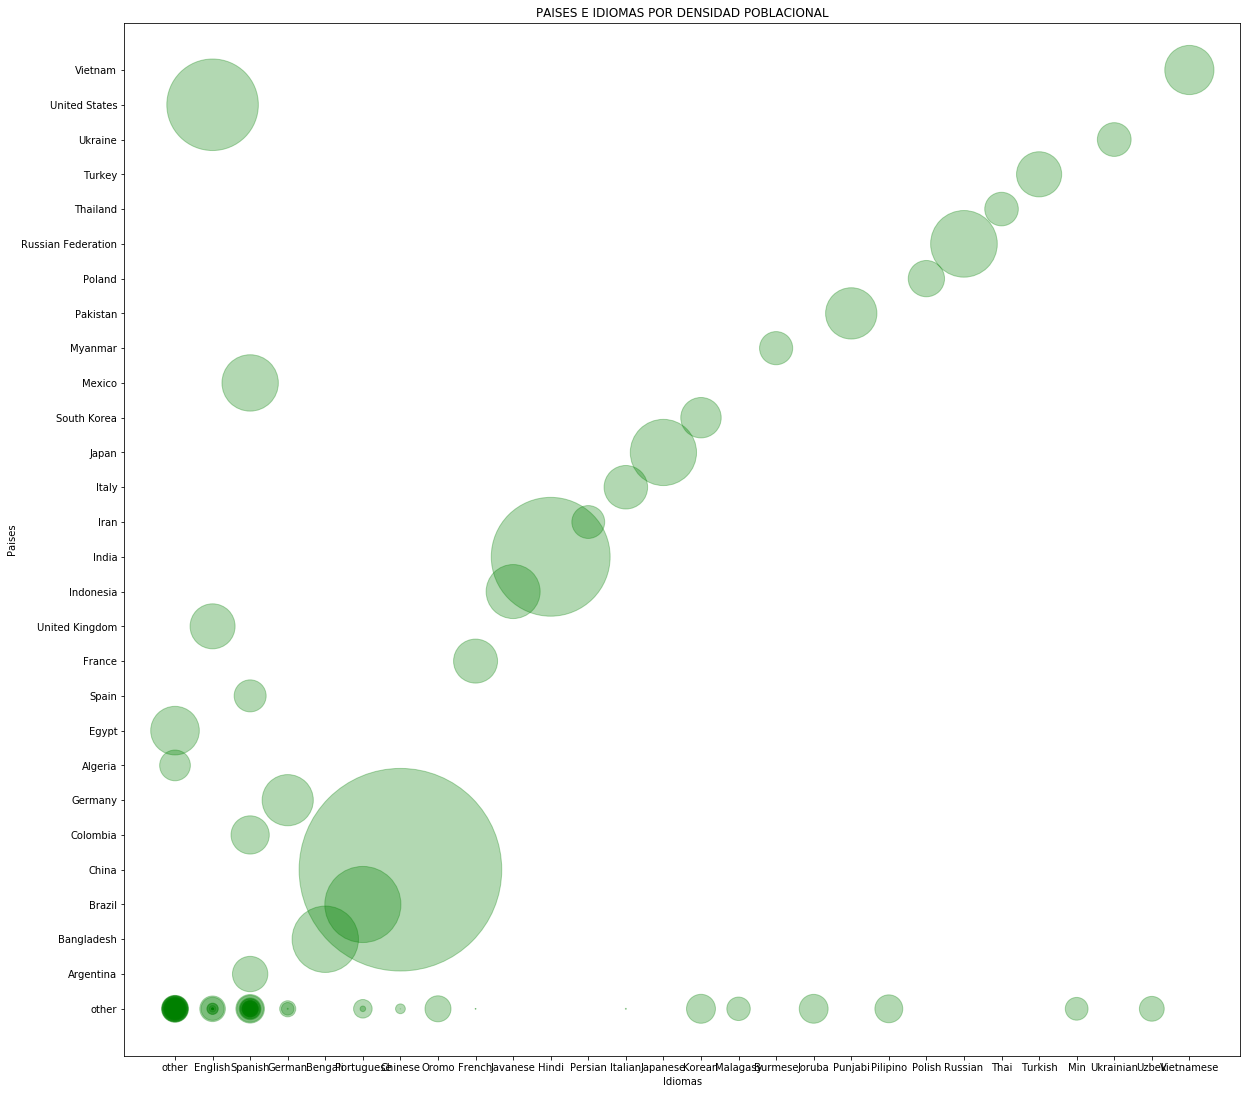

In [31]:
scatterplot(x,y,s, color = 'g',y_label='Paises',x_label='Idiomas', title='PAISES E IDIOMAS POR DENSIDAD POBLACIONAL')

#### La grafica representa los idiomas por país comparados por densidad poblacional la cual esta representada por el tamaño de las circunferencias siendo china la de mayor densidad así mismo la intensidad de color representa que tantas veces se repite el dato dentro del conjunto. 

### Punto 2 - Expectativa de Vida de las personas que hablan Inglés (no importa si es como idioma principal o secundario)

In [32]:
Data_language.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


In [33]:
Data_language.describe()

,Percentage
count,984.000000
mean,20.374390
std,30.829452
min,0.000000
25%,1.275000
50%,5.300000
75%,21.125000
max,100.000000


Primero crea una un Dataframe que contega solo los paises que hablan ingles

In [34]:
Ingles=Data_language.loc[Data_language['Language']=='English']
Ingles.head()

,CountryCode,Language,IsOfficial,Percentage
1,ABW,English,F,9.5
18,AIA,English,T,0.0
27,ANT,English,F,7.8
36,ASM,English,T,3.1
40,ATG,English,T,0.0


In [35]:
Ingles.shape

(60, 4)

Luego se hace un merge de esta base de datos con la de Data_country

In [36]:
English_data_country = Data_country.merge(Ingles,on=['CountryCode'])
English_data_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,CountryCode,Language,IsOfficial,Percentage
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,ABW,English,F,9.5
1,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,AIA,English,T,0.0
2,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.0,NaN,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix,33.0,AN,ANT,English,F,7.8
3,ASM,American Samoa,Oceania,Polynesia,199.0,NaN,68000,75.1,334.0,NaN,Amerika Samoa,US Territory,George W. Bush,54.0,AS,ASM,English,T,3.1
4,ATG,Antigua and Barbuda,North America,Caribbean,442.0,1981.0,68000,70.5,612.0,584.0,Antigua and Barbuda,Constitutional Monarchy,Elisabeth II,63.0,AG,ATG,English,T,0.0


Se reemplazan los valores de Percentage 0.0 por 100.0

In [37]:
English_data_country['Percentage']=English_data_country['Percentage'].replace(to_replace=0.0, value=100.0)

Se crea una variable adicional igual a la la magnitud de personas que habalan ingles en cada país

In [38]:
English_data_country['Pob_habla_ing']=English_data_country['Percentage']*English_data_country['Population']
English_data_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,CountryCode,Language,IsOfficial,Percentage,Pob_habla_ing
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,ABW,English,F,9.5,978500.0
1,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,AIA,English,T,100.0,800000.0
2,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.0,NaN,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix,33.0,AN,ANT,English,F,7.8,1692600.0
3,ASM,American Samoa,Oceania,Polynesia,199.0,NaN,68000,75.1,334.0,NaN,Amerika Samoa,US Territory,George W. Bush,54.0,AS,ASM,English,T,3.1,210800.0
4,ATG,Antigua and Barbuda,North America,Caribbean,442.0,1981.0,68000,70.5,612.0,584.0,Antigua and Barbuda,Constitutional Monarchy,Elisabeth II,63.0,AG,ATG,English,T,100.0,6800000.0


Se crea otra variable calculando la participación de población de habla inglesa de cada país, sobre el total de la población que habla ingles, y así calcular el promedio ponderado de la espectativa de vida

In [39]:
English_data_country['Participación_habla_ing']=English_data_country['Pob_habla_ing']/English_data_country['Pob_habla_ing'].sum()

English_data_country['Ponderación']=English_data_country['Participación_habla_ing']*English_data_country['LifeExpectancy']


English_data_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,...,HeadOfState,Capital,Code2,CountryCode,Language,IsOfficial,Percentage,Pob_habla_ing,Participación_habla_ing,Ponderación
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,...,Beatrix,129.0,AW,ABW,English,F,9.5,978500.0,0.000028,0.002172
1,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,...,Elisabeth II,62.0,AI,AIA,English,T,100.0,800000.0,0.000023,0.001724
2,ANT,Netherlands Antilles,North America,Caribbean,800.0,NaN,217000,74.7,1941.0,NaN,...,Beatrix,33.0,AN,ANT,English,F,7.8,1692600.0,0.000048,0.003580
3,ASM,American Samoa,Oceania,Polynesia,199.0,NaN,68000,75.1,334.0,NaN,...,George W. Bush,54.0,AS,ASM,English,T,3.1,210800.0,0.000006,0.000448
4,ATG,Antigua and Barbuda,North America,Caribbean,442.0,1981.0,68000,70.5,612.0,584.0,...,Elisabeth II,63.0,AG,ATG,English,T,100.0,6800000.0,0.000193,0.013574


In [40]:
English_data_country['Ponderación'].sum()

76.91482613299888

#### La expectativa de vida de una persona que habla ingles es aproximadamente de 77 años

### Punto 3 - Modelo de Cluster No Supervisado 

#### Se procede a unificar las bases de datos 

Se generaliza la base de leguaje para dejarla respecto al Pais 

In [41]:
y = pd.DataFrame(pd.pivot_table(Data_language,index=['CountryCode'],columns=['Language']))

In [42]:
y.reset_index(inplace=True)

In [43]:
y.columns = y.columns.droplevel(0)

In [44]:
y['CountryCode'] = y['']

In [45]:
z = y.replace(0, 100)

In [46]:
lengua = z.replace(np.nan,0)

In [47]:
Lengua_fin = lengua.drop([''], axis=1)
Lengua_fin.head()

Language,Abhyasi,Acholi,Adja,Afar,Afrikaans,Aimará,Ainu,Aizo,Akan,Albaniana,...,Yap,Yi,Yucatec,Zande,Zapotec,Zenaga,Zhuang,Zulu,[South]Mande,CountryCode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABW
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFG
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGO
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AIA
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ALB


Se generaliza la variable de Estados

In [48]:
new2 = pd.DataFrame(Data_city.groupby(['CountryCode'], sort=False)['District'].count(),columns=['District'])

In [49]:
new2.reset_index(level=0, inplace=True)

In [50]:
Estados = new.merge(new2,on=['CountryCode'])

In [51]:
Estados.head()

,CountryCode,Population,District
0,AFG,2332100.0,4
1,NLD,5050879.0,27
2,ALB,270000.0,1
3,DZA,4434123.0,12
4,ASM,7523.0,2


Se llaman las variables que se van a usar del dato Pais 

In [52]:
Pais = Data_country.drop(['Code','Name','Continent','Region','IndepYear','GNPOld','LocalName','GovernmentForm','HeadOfState','Code2'],axis=1)

In [53]:
Pais.head()

,SurfaceArea,Population,LifeExpectancy,GNP,Capital,CountryCode
0,193.0,103000,78.4,828.0,129.0,ABW
1,652090.0,22720000,45.9,5976.0,1.0,AFG
2,1246700.0,12878000,38.3,6648.0,56.0,AGO
3,96.0,8000,76.1,63.2,62.0,AIA
4,28748.0,3401200,71.6,3205.0,34.0,ALB


Se unen las variables de los dataframe por countrycode

In [54]:
Data_Total = Pais.merge(Estados,on=['CountryCode'])

In [55]:
Data_Total1 = Data_Total.merge(Lengua_fin,on=['CountryCode'])

Se genera la Variable X

In [56]:
X = Data_Total1.drop(['CountryCode'], axis=1)

Se mira el tamaño del data frame 

In [57]:
X.shape

(204, 464)

Se determina si hay NAN

In [58]:
X.isnull().values.any()

True

Se eliminan los NAN 

In [59]:
X1 = X.dropna()
X1.isnull().values.any()

False

In [60]:
X1.shape

(200, 464)

Se normalizan los datos 

In [61]:
from sklearn.preprocessing import normalize

In [62]:
X_fin = pd.DataFrame(normalize(X1),columns=X1.columns)

In [63]:
X_fin.head()

,SurfaceArea,Population_x,LifeExpectancy,GNP,Capital,Population_y,District,Abhyasi,Acholi,Adja,...,Yao,Yap,Yi,Yucatec,Zande,Zapotec,Zenaga,Zhuang,Zulu,[South]Mande
0,0.028539,0.994368,0.000002,0.000262,4.376620e-08,0.102067,1.750648e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.094523,0.976394,0.000003,0.000504,4.245850e-06,0.194217,3.790937e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008426,0.996828,0.000021,0.000939,9.964764e-06,0.079132,2.930813e-07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005789,0.964813,0.001033,0.020162,6.803168e-04,0.262095,1.236940e-05,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027938,0.815751,0.000025,0.012688,2.172218e-05,0.577588,1.670937e-06,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se procede a realizar el modelo de cluster K-Means

In [64]:
from sklearn.cluster import KMeans

In [65]:
cls = KMeans(n_jobs=-1,n_clusters=8,random_state=123)

In [66]:
cls.fit(X_fin)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [67]:
cls.labels_

array([4, 0, 4, 5, 2, 6, 6, 4, 1, 5, 5, 4, 0, 0, 4, 4, 5, 5, 2, 0, 6, 5,
       4, 6, 0, 4, 4, 4, 1, 0, 1, 4, 6, 0, 0, 0, 0, 6, 2, 0, 4, 5, 6, 6,
       5, 2, 5, 4, 4, 0, 6, 5, 4, 5, 6, 4, 5, 4, 4, 5, 1, 6, 6, 4, 0, 0,
       4, 0, 4, 0, 3, 4, 1, 1, 6, 0, 5, 0, 0, 0, 4, 0, 6, 6, 6, 5, 4, 6,
       2, 5, 4, 0, 4, 4, 5, 2, 0, 4, 6, 5, 1, 4, 5, 4, 0, 6, 6, 2, 0, 5,
       4, 5, 5, 6, 5, 4, 4, 0, 1, 4, 0, 1, 7, 5, 5, 4, 0, 4, 1, 4, 0, 5,
       5, 0, 4, 6, 0, 0, 4, 6, 6, 2, 4, 5, 5, 5, 4, 4, 5, 5, 2, 0, 5, 6,
       4, 6, 0, 5, 7, 4, 0, 0, 5, 4, 2, 1, 4, 0, 4, 4, 5, 7, 4, 0, 4, 0,
       4, 4, 0, 6, 7, 2, 4, 4, 6, 6, 5, 0, 0, 5, 6, 0, 4, 0, 0, 4, 0, 6,
       5, 5])

In [68]:
Cluster_Centers = pd.DataFrame(cls.cluster_centers_, columns= X_fin.columns, index = ['C1','C2','C3','C4','C5','C6','C7','C8'])

In [69]:
Cluster_Centers

,SurfaceArea,Population_x,LifeExpectancy,GNP,Capital,Population_y,District,Abhyasi,Acholi,Adja,...,Yao,Yap,Yi,Yucatec,Zande,Zapotec,Zenaga,Zhuang,Zulu,[South]Mande
C1,0.030418,0.984978,0.000061,0.003909,0.002686,0.164114,1.244660e-06,-1.033976e-24,1.033976e-24,3.925545e-08,...,1.654361e-24,-1.588187e-22,1.012034e-11,-1.292470e-26,4.483594e-09,-6.462349e-27,1.240771e-24,2.361412e-11,1.500215e-07,1.111219e-08
C2,0.337859,0.889215,0.000066,0.004953,0.002441,0.275629,1.235185e-06,6.203855e-25,0.000000e+00,0.000000e+00,...,1.654361e-24,7.940934e-23,-4.038968e-28,-1.938705e-26,0.000000e+00,0.000000e+00,3.714383e-08,-8.077936e-28,0.000000e+00,8.271806e-25
C3,0.015953,0.821852,0.001336,0.008657,0.043731,0.554187,1.858622e-05,6.203855e-25,0.000000e+00,0.000000e+00,...,1.654361e-24,7.940934e-23,-4.038968e-28,-1.938705e-26,0.000000e+00,0.000000e+00,-4.135903e-25,-8.077936e-28,0.000000e+00,8.271806e-25
C4,0.999647,0.025844,0.000031,0.000000,0.000423,0.006205,4.614982e-07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
C5,0.024771,0.995619,0.000116,0.004775,0.002670,0.077342,2.329933e-06,-1.240771e-24,3.604600e-09,1.158053e-23,...,2.149929e-08,-1.852885e-22,8.077936e-28,-3.231174e-26,1.447566e-24,-1.292470e-26,1.654361e-24,4.846761e-27,3.536070e-08,8.271806e-25
C6,0.020040,0.964174,0.000274,0.007744,0.008270,0.259754,6.178885e-06,-8.271806e-25,6.203855e-25,8.271806e-24,...,8.271806e-25,1.179793e-06,8.077936e-28,2.702984e-10,8.271806e-25,1.474355e-10,1.240771e-24,4.846761e-27,0.000000e+00,-1.240771e-24
C7,0.031412,0.922947,0.000210,0.006443,0.002728,0.379911,3.559086e-06,1.041488e-08,-2.067952e-25,3.308722e-24,...,1.654361e-24,-1.058791e-22,0.000000e+00,2.584939e-26,2.067952e-25,1.938705e-26,8.271806e-25,4.038968e-27,1.696635e-08,-8.271806e-25
C8,0.020039,0.917831,0.006738,0.003815,0.281338,0.250870,9.059976e-05,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


#### Se logra determinar que los datos que tienen mayor relevancia dentro del modelo son los datos de población expectativa de vida GNP Capital y población independiente del tipo de idioma que maneja cada país.